In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1=pd.read_csv('....../email/email_opened_table.csv')
df2=pd.read_csv('....../email/link_clicked_table.csv')
df3=pd.read_csv('....../email/email_table.csv')

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(10345, 1)
(2119, 1)
(100000, 7)


In [4]:
df1.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [5]:
df2.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [6]:
df3.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [7]:
print(len(df1['email_id'].unique())==len(df1['email_id']))
print(len(df2['email_id'].unique())==len(df2['email_id']))
print(len(df3['email_id'].unique())==len(df3['email_id']))

True
True
True


#### Create columns with email opened & link opened

In [8]:
df1['email_opened']=1
df2['link_clicked']=1

In [9]:
df=df3.merge(df1, how='left', on='email_id')
df=df.merge(df2,how='left', on='email_id' )

In [10]:
df.dtypes

email_id                 int64
email_text              object
email_version           object
hour                     int64
weekday                 object
user_country            object
user_past_purchases      int64
email_opened           float64
link_clicked           float64
dtype: object

In [11]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN


In [12]:
df = df.fillna({'email_opened': 0, 'link_clicked': 0})
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
email_id,100000.0,498690.19616,289230.727534,8.0,246708.25,498447.0,749942.75,999998.0
hour,100000.0,9.05930,4.439637,1.0,6.00,9.0,12.00,24.0
user_past_purchases,100000.0,3.87845,3.196110,0.0,1.00,3.0,6.00,22.0
email_opened,100000.0,0.10345,0.304547,0.0,0.00,0.0,0.00,1.0
link_clicked,100000.0,0.02119,0.144018,0.0,0.00,0.0,0.00,1.0


### Percentage of users opened the email and clicked on the link within the email

In [14]:
len(df1)/float(100000)*100 

10.345

In [15]:
(len(df2)/float(len(df1)))*100 

20.483325277912034

### Build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

In [16]:
df_country=df[['email_opened', 'link_clicked', 'user_country']]
df_country1=df_country.groupby('user_country').mean()
df_country2=df_country1.transpose()
df_country2

user_country,ES,FR,UK,US
email_opened,0.039129,0.040620,0.120167,0.11902
link_clicked,0.008327,0.008004,0.024675,0.02436


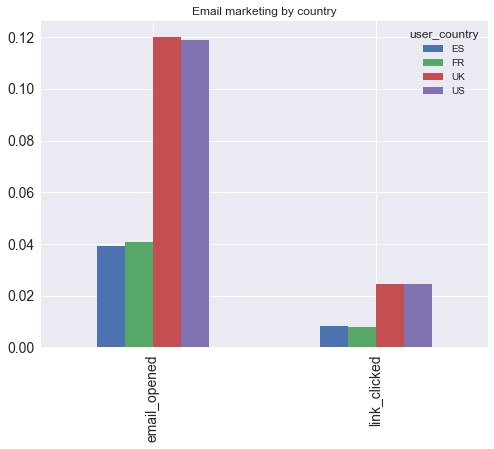

In [17]:
plt1=df_country2.plot(kind='bar', title='Email marketing by country', figsize=(8,6), legend=True, fontsize=14)

### Emails opened and links clicked by weekday

In [18]:
df_weekday=df[['email_opened', 'link_clicked', 'weekday']]
df_weekday1=df_weekday.groupby('weekday').mean()
df_weekday2=df_weekday1.transpose()
df_weekday2

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
email_opened,0.074134,0.116062,0.087652,0.087649,0.118442,0.120484,0.120278
link_clicked,0.014037,0.022906,0.017846,0.016751,0.024445,0.024889,0.027620


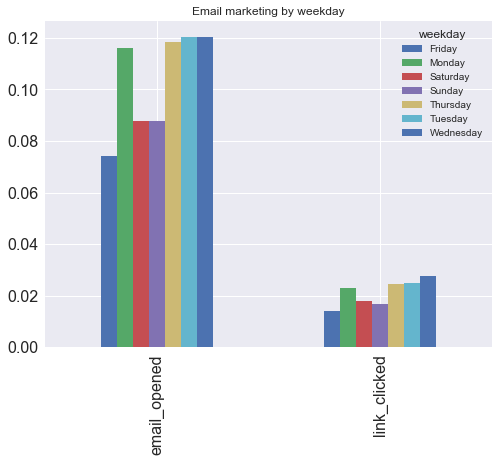

In [19]:
plt2=df_weekday2.plot(kind='bar', title='Email marketing by weekday', figsize=(8,6), legend=True, fontsize=16)

### Emails opened and links clicked by hour

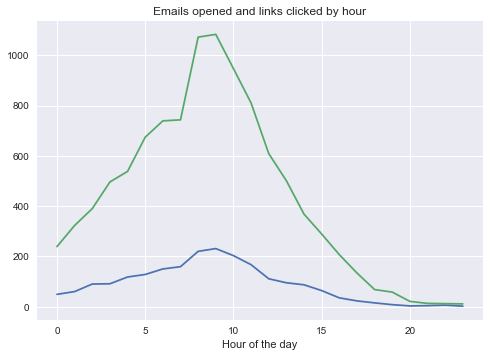

In [20]:
import pylab as p

df_hour=df[(df['link_clicked']==1)] 
x, binEdges=np.histogram(df_hour['hour'], bins=24)
p.plot(x,'-',label='email_opened')
p.title("Emails opened and links clicked by hour")
p.xlabel("Hour of the day")


df_hour=df[(df['email_opened']==1)]
x, binEdges=np.histogram(df_hour['hour'], bins=24)
p.plot(x,'-',label='link_clicked')
p.title("Emails opened and links clicked by hour")
p.xlabel("Hour of the day")



In [21]:
pd.unique(df.email_text)

array(['short_email', 'long_email'], dtype=object)

### EDA for User_past_purchases & email opened and links clicked

In [22]:
grouped = df.groupby( "email_opened")
email_opened = grouped[ "user_past_purchases"].describe()
email_opened = email_opened.unstack( level=-1)
email_opened

       email_opened
count  0.0             89655.000000
       1.0             10345.000000
mean   0.0                 3.785154
       1.0                 4.686999
std    0.0                 3.169901
       1.0                 3.306502
min    0.0                 0.000000
       1.0                 0.000000
25%    0.0                 1.000000
       1.0                 2.000000
50%    0.0                 3.000000
       1.0                 4.000000
75%    0.0                 6.000000
       1.0                 7.000000
max    0.0                21.000000
       1.0                22.000000
dtype: float64

In [23]:
grouped = df.groupby( "link_clicked")
link_clicked = grouped[ "user_past_purchases"].describe()
link_clicked = link_clicked.unstack( level=-1)
link_clicked

       link_clicked
count  0.0             97881.000000
       1.0              2119.000000
mean   0.0                 3.828864
       1.0                 6.168948
std    0.0                 3.168514
       1.0                 3.601982
min    0.0                 0.000000
       1.0                 0.000000
25%    0.0                 1.000000
       1.0                 3.000000
50%    0.0                 3.000000
       1.0                 6.000000
75%    0.0                 6.000000
       1.0                 8.000000
max    0.0                21.000000
       1.0                22.000000
dtype: float64

### Model fitting to find most important features

In [24]:
cols =['email_text', 'email_version', 'user_country','weekday']
data_1 = df[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, df], axis=1)
result_df.head()

,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US,weekday_Friday,weekday_Monday,...,weekday_Wednesday,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,0,1,0,1,0,0,0,1,0,0,...,0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,1,0,0,1,0,0,1,0,0,0,...,0,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,1,0,0,1,0,0,0,1,0,0,...,1,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,0,1,1,0,0,0,1,0,0,1,...,0,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,1,0,1,0,0,0,0,1,0,1,...,0,106887,long_email,generic,14,Monday,US,6,0.0,0.0


### Logistic Regression to find features for emails opened

In [25]:
result_df2 = result_df[['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases','email_opened']]
y = result_df2['email_opened'].values
X = result_df2[['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 

lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight="balanced")  
lr_clf.fit(X_train_scaled,y_train)  

y_hat = lr_clf.predict(X_test_scaled) 


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc)
print("Confusion matrix : ")
print(conf)


print("Classification Report..")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


accuracy: 0.5807
Confusion matrix : 
[[5151 3851]
 [ 342  656]]
Classification Report..
             precision    recall  f1-score   support

        0.0       0.94      0.57      0.71      9002
        1.0       0.15      0.66      0.24       998

avg / total       0.86      0.58      0.66     10000



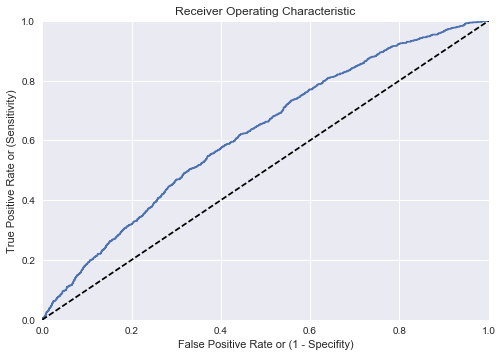

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')

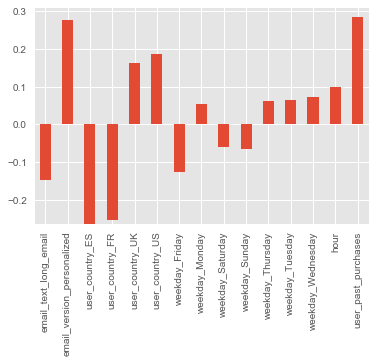

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = ['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases'])
weights.plot(kind='bar')
plt.show()

### Logistic Regression for links clicked

In [28]:
result_df2 = result_df[['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases','link_clicked']]
y = result_df2['link_clicked'].values
X = result_df2[['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 

lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight="balanced") 
lr_clf.fit(X_train_scaled,y_train)  

y_hat = lr_clf.predict(X_test_scaled) 

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [29]:
# The false positive and true positive rates
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc) 
print("Confusion matrix : ")
print(conf)


accuracy: 0.6791
Confusion matrix : 
[[6661 3143]
 [  66  130]]


ROC AUC: 0.71


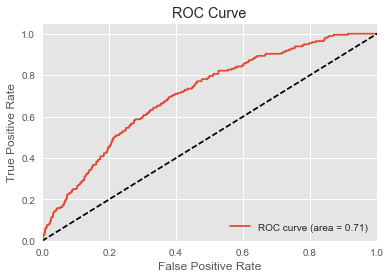

In [30]:
fpr, tpr, _ = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])

# The AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


             precision    recall  f1-score   support

        0.0       0.99      0.68      0.81      9804
        1.0       0.04      0.66      0.07       196

avg / total       0.97      0.68      0.79     10000



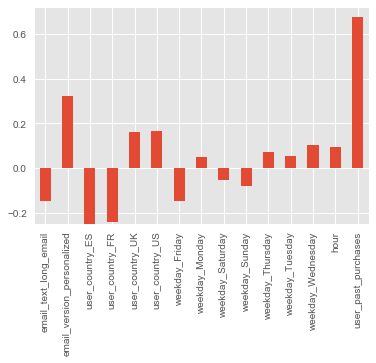

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = ['email_text_long_email',
       'email_version_personalized',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hour','user_past_purchases'])
weights.plot(kind='bar')
plt.show()